<a href="https://colab.research.google.com/github/fabiorisantos/Modelo_Titanic_DIO_Carrefour/blob/main/modelo_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor:** Fábio Ribeiro dos Santos

**Contato:**[fabio_ribeiro1981@yahoo.com.br](mailto:fabio_ribeiro1981@yahoo.com.br)

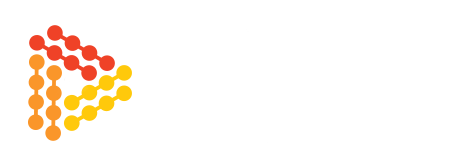

# **Dados do Titanic**

[https://www.kaggle.com/](https://www.kaggle.com/)

# **Pacotes Necessários**

In [10]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# **Lendo o banco de dados**

In [44]:
dados = pd.read_csv('train.csv')

In [45]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
dados = dados.drop (['Name', 'Ticket','Cabin', 'Embarked'], axis= 1)

In [47]:
dados.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


# **Editando Chave e Variável de Resposta**

In [48]:
dados = dados.set_index ( [ 'PassengerId' ] )
dados = dados.rename ( columns = { 'Survived' : 'target' } , inplace = False )

In [49]:
dados.head()

,target,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


# **Descritiva**

In [50]:
dados.describe()

,target,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
dados.describe(include=['O'])

,Sex
count,891
unique,2
top,male
freq,577


# **Transformação dos dados**

In [53]:
dados['Sex_F'] = np.where(dados['Sex'] == 'female',1,0)

dados['Pclass_1'] = np.where(dados['Pclass'] == 1,1,0)
dados['Pclass_2'] = np.where(dados['Pclass'] == 2,1,0)
dados['Pclass_3'] = np.where(dados['Pclass'] == 3,1,0)

In [54]:
dados = dados.drop(['Pclass','Sex'], axis=1)

In [55]:
dados.head()

,target,Age,SibSp,Parch,Fare,Sex_F,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,0,1
2,1,38.0,1,0,71.2833,1,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,1
4,1,35.0,1,0,53.1000,1,1,0,0
5,0,35.0,0,0,8.0500,0,0,0,1


In [56]:
dados.isnull().sum()

target        0
Age         177
SibSp         0
Parch         0
Fare          0
Sex_F         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [57]:
dados.fillna(0, inplace=True)

In [58]:
dados.isnull().sum()

target      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_F       0
Pclass_1    0
Pclass_2    0
Pclass_3    0
dtype: int64

# **Amostragem**

In [63]:
x_train,x_test,y_train,y_test=train_test_split(dados.drop(['target'],axis=1),
                                               dados['target'],
                                               test_size=0.3,
                                               random_state=1234)
({'treino': x_train.shape},{'teste': x_test.shape})

({'treino': (623, 8)}, {'teste': (268, 8)})

# **Modelo**

In [64]:
rmdforest = RandomForestClassifier(n_estimators = 1000,
                                   criterion = 'gini',
                                   max_depth = 5)

rmdforest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
probabilidade = rmdforest.predict_proba(dados.drop('target', axis=1))[:,1]
classificacao = rmdforest.predict(dados.drop('target', axis=1))

In [66]:
dados['probabilidade'] = probabilidade
dados['classificacao'] = classificacao

In [67]:
dados

,target,Age,SibSp,Parch,Fare,Sex_F,Pclass_1,Pclass_2,Pclass_3,probabilidade,classificacao
PassengerId,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,0,1,0.125038,0
2,1,38.0,1,0,71.2833,1,1,0,0,0.933340,1
3,1,26.0,0,0,7.9250,1,0,0,1,0.436829,0
4,1,35.0,1,0,53.1000,1,1,0,0,0.916213,1
5,0,35.0,0,0,8.0500,0,0,0,1,0.146522,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,0,0,1,0,0.130488,0
888,1,19.0,0,0,30.0000,1,1,0,0,0.854446,1
889,0,0.0,1,2,23.4500,1,0,0,1,0.498579,0
